In [91]:
#Importing libraries
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xg
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [102]:
#Reading data
data =pd.read_excel("Data_Train.xlsx")

In [59]:
data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


In [60]:
data.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [61]:
data_test = pd.read_excel("Data_Test.xlsx")

In [62]:
data_test

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


## **EDA (EXPLORATORY DATA ANALYSIS)**

In [63]:
data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [64]:
price = data.Price

In [65]:
data.drop('Price', axis =1 , inplace = True)

In [66]:
new_data = data.append(data_test)

C:\Users\purva\AppData\Local\Temp/ipykernel_16392/2697255195.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = data.append(data_test)


In [67]:
new_data.shape

(7797, 8)

In [68]:
#splitting Contents of Edition columns and adding them in new_colmn['New_edition]
new_data['New_edition'] = new_data.Edition.apply(lambda x: (x.split(",")[0]))

In [69]:
new_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,New_edition
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover
...,...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",Paperback
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts",Paperback
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour,Paperback
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",Paperback


In [70]:
#Converting labels into numeric form
le = LabelEncoder()
new_data.Author = le.fit_transform(new_data.Author)
new_data.Genre = le.fit_transform(new_data.Genre)
new_data.BookCategory = le.fit_transform(new_data.BookCategory)
new_data.New_edition = le.fit_transform(new_data.New_edition)

In [71]:
new_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,New_edition
0,The Prisoner's Gold (The Hunters 3),748,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,1,0,13
1,Guru Dutt: A Tragedy in Three Acts,370,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,78,2,13
2,Leviathan (Penguin Classics),4045,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",202,6,13
3,A Pocket Full of Rye (Miss Marple),79,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,96,5,13
4,LIFE 70 Years of Extraordinary Photography,1138,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",264,1,8


In [72]:
new_data.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'New_edition'],
      dtype='object')

In [73]:
new_data.drop('Synopsis', axis=1, inplace = True)

In [74]:
new_data.drop('Title', axis =1 , inplace = True)

In [75]:
new_data.drop('Edition', axis=1, inplace= True)

In [76]:
#splitting contents(extracting only float value)
new_data['Reviews'] = new_data.Reviews.apply (lambda x: float(x.split()[0]))

In [77]:
#Extracting string value and storing them as float
new_data['Ratings'] = new_data.Ratings.str.extract ('(\d+)')
new_data['Ratings'] = new_data.Ratings.astype(float)

In [78]:
new_data.head()

,Author,Reviews,Ratings,Genre,BookCategory,New_edition
0,748,4.0,8.0,1,0,13
1,370,3.9,14.0,78,2,13
2,4045,4.8,6.0,202,6,13
3,79,4.1,13.0,96,5,13
4,1138,5.0,1.0,264,1,8


In [96]:
#retrieving specific data
training = new_data.iloc[:6237]

In [80]:
training['Price'] = price

C:\Users\purva\AppData\Local\Temp/ipykernel_16392/2821050696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Price'] = price


In [81]:
training.head()

,Author,Reviews,Ratings,Genre,BookCategory,New_edition,Price
0,748,4.0,8.0,1,0,13,220.00
1,370,3.9,14.0,78,2,13,202.93
2,4045,4.8,6.0,202,6,13,299.00
3,79,4.1,13.0,96,5,13,180.00
4,1138,5.0,1.0,264,1,8,965.62


In [82]:
#quantile(0.25) returns the value at the first quartile of the data
#quantile(0.75) returns the value at the third quartile of the data
Q1 = training.Price.quantile(0.25)
Q3 = training.Price.quantile(0.75)
IQR = Q3-Q1 
training = training[(training.Price <= Q3 + 1.5*IQR)]

In [97]:
testing=new_data.iloc[6237:]

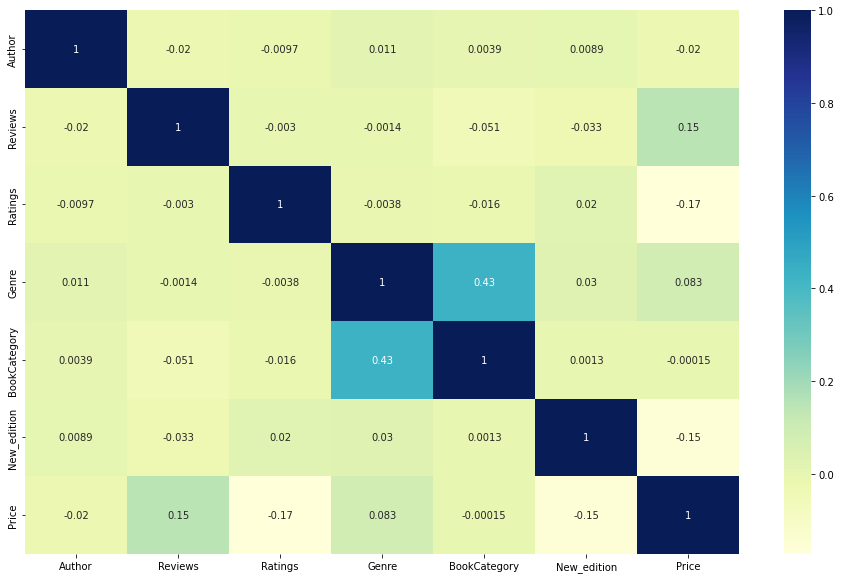

In [83]:
#Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(training.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

## **SPLITTING DATA**

In [84]:
X=training.drop('Price',axis=1)
y=training[['Price']]

In [88]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=101)

## **MODEL BUILDING**

In [89]:
lm=LinearRegression()
lm.fit(x_train,y_train)

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

xgb=xg.XGBRegressor()
xgb.fit(x_train,y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

C:\Users\purva\AppData\Local\Temp/ipykernel_16392/122886941.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

## **MODEL EVALUATION**

In [90]:
#prediction for x_test
prediction_lm = lm.predict(x_test)
prediction_knn = knn.predict(x_test)
prediction_dtr = dtr.predict(x_test)
prediction_xgb = xgb.predict(x_test)
prediction_rf = rf.predict(x_test)

In [93]:
print(mean_squared_error(y_test,prediction_lm))
print(mean_squared_error(y_test,prediction_knn))
print(mean_squared_error(y_test,prediction_dtr))
print(mean_squared_error(y_test,prediction_xgb))
print(mean_squared_error(y_test,prediction_rf))

48058.93891059243
49091.58193712625
74026.77256215131
39653.068196763634
43027.339437498034


In [103]:
print('RMSE_Linear Regression:', np.sqrt(mean_squared_log_error(y_test,abs(prediction_lm))))
print('RMSE_KNeighbors Regressor:', np.sqrt(mean_squared_log_error(y_test,abs(prediction_knn))))
print('RMSE_Decision Tree:', np.sqrt(metrics.mean_squared_log_error(y_test,abs(prediction_dtr))))
print('RMSE_Xgb:', np.sqrt(metrics.mean_squared_log_error(y_test,abs(prediction_xgb))))
print('RMSE_Random Forest:', np.sqrt(metrics.mean_squared_log_error(y_test,abs(prediction_rf))))

RMSE_Linear Regression: 0.6124940390501222
RMSE_KNeighbors Regressor: 0.5856685727161499
RMSE_Decision Tree: 0.689523765194977
RMSE_Xgb: 0.5240629952937783
RMSE_Random Forest: 0.5465059444950955


In [104]:
#RMSE AND MSE values for XGB models are lower hence we use XGB to prediction

## **PREDICTION**

In [105]:
#price prediction
prediction_test=xgb.predict(testing)

In [99]:
prediction_test

array([249.82137, 805.93146, 399.83286, ..., 483.14145, 407.00204,
       489.53943], dtype=float32)

In [100]:
results = pd.DataFrame(data = prediction_test, columns = ["Price"])

In [101]:
results

,Price
0,249.821365
1,805.931458
2,399.832855
3,600.696594
4,429.273254
...,...
1555,829.522461
1556,187.518295
1557,483.141449
1558,407.002045
